# Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load Dataset

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')

In [25]:
print(df.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


# Preprocessing

In [43]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


# Convert age from days to years

In [45]:

df['age'] = (df['age'] / 365).round().astype(int)  

# Visualize class distribution

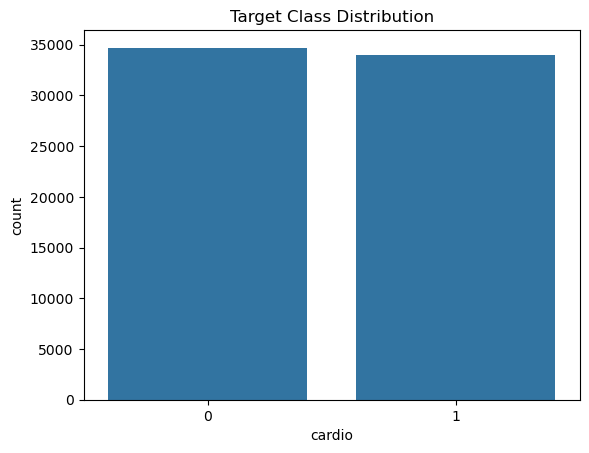

In [48]:
sns.countplot(x='cardio', data=df)
plt.title('Target Class Distribution')
plt.show()

# Drop outliers based on BP

In [29]:
df = df[(df['ap_hi'] >= 80) & (df['ap_hi'] <= 200)]
df = df[(df['ap_lo'] >= 50) & (df['ap_lo'] <= 150)]

# Features and Target

In [31]:
X = df.drop(columns=['cardio'])
y = df['cardio']

# Normalize numerical features

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


# Logistic Regression

In [37]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest

In [39]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)



# Evaluation Function

In [40]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate Models


Logistic Regression Evaluation
Accuracy: 0.7270278141837775
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6941
           1       0.75      0.67      0.71      6793

    accuracy                           0.73     13734
   macro avg       0.73      0.73      0.73     13734
weighted avg       0.73      0.73      0.73     13734



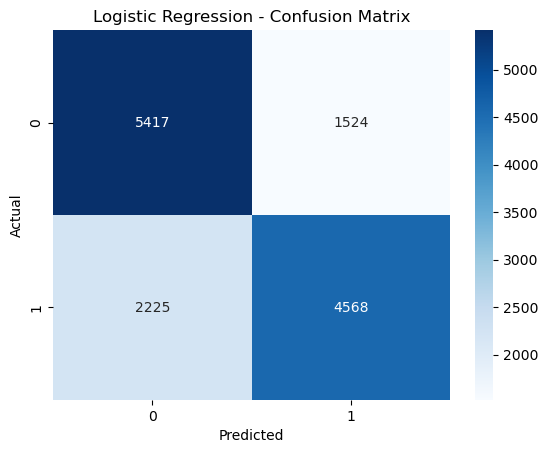


Random Forest Evaluation
Accuracy: 0.7199650502402796
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      6941
           1       0.73      0.70      0.71      6793

    accuracy                           0.72     13734
   macro avg       0.72      0.72      0.72     13734
weighted avg       0.72      0.72      0.72     13734



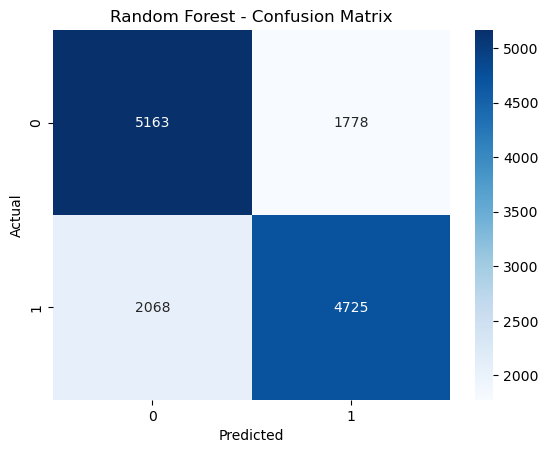

In [19]:
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)

# Accuracy Comparison

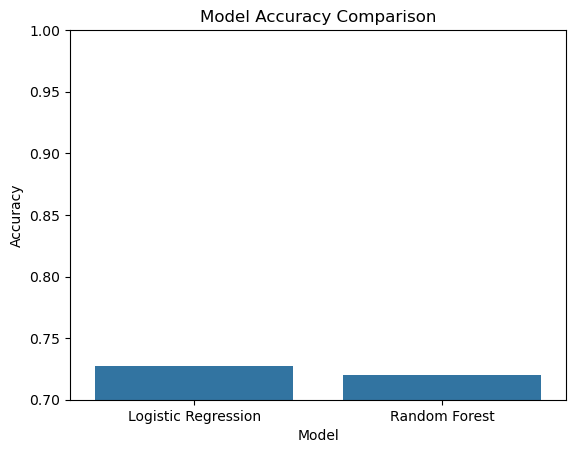


Final Accuracy Table:
                 Model  Accuracy
0  Logistic Regression  0.727028
1        Random Forest  0.719965


In [20]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)]
})

sns.barplot(x='Model', y='Accuracy', data=results)
plt.ylim(0.7, 1)
plt.title('Model Accuracy Comparison')
plt.show()

print("\nFinal Accuracy Table:")
print(results)
